### **Machine Learning: Assignment No. 1**
#### ***Question No. 1 (a): Mess meal timing dataset EDA and model fitting***  
---
**Student Name: Mayuresh Rajesh Dindorkar**  
**Roll No.    : CS23MTECH14007**  

**Student Name: Sanyam Kaul**  
**Roll No.    : CS23MTECH14011**

---
**Index:**  
**Step 1. Reading dataset**  
**Step 2. EDA**  
    &emsp;(A) **Feature Engineering**  
    &emsp;(B) Understanding the datatype of each feature  
    &emsp;(C) Checking for null values  
    &emsp;(D) Printing number of unique values in each categorical feature  
    &emsp;(E) **Descriptive Statistics**: Printing feature-wise statistical info of entire dataset  
    &emsp;(F) **Data Visualization:**  
        &emsp;&emsp;1. Scatter plot for 'Time taken' against different days for each meal type  
        &emsp;&emsp;2. Combined line graph for 'Time taken' against different days for each meal type  
        &emsp;&emsp;3. Scatter plot of 'Category' Vs 'Time taken'  
        &emsp;&emsp;4. Analyzing boxplots for 'Time taken' Vs Each categorical feature  
        &emsp;&emsp;5. Analyzing the correlation between 'Time taken' and 'Minute' feature  
        &emsp;&emsp;6. Plotting pair plot for 'Time taken' against all non-categorical features  
        &emsp;&emsp;7. Scatter plot of 'Time taken' Vs 'Minute' (Same plot can be seen from pairplot)  
        &emsp;&emsp;8. Visualizing histogram of 'Time taken' column to see its distribution pattern  
**Step 3. Feature engineering:**  
    &emsp;(A) **Feature selection:** Deleting 'Minute' feature from X  
    &emsp;(B) **Feature Transformation:** Applying One Hot Encoding on categorical features 'Day', 'Holiday' and 'Category'  
**Step 4: Segregating the dataset into Train and Test set**  
**Step 5: Fitting the Linear Regression model**  
**Step 6: Fitting the Poisson Regression model**  
**Step 7: Comparing Linear regression and Poisson regression performance**  

In [39]:
# Installing the required packages
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install matplotlib

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings as w
import seaborn as sns
w.filterwarnings("ignore")
%matplotlib inline

##### **Step 1: Reading the dataset from csv file**

In [2]:
mess_dataset = pd.read_csv('MessFoodTimingsDataset.csv',sep=',')
print('Mess timings dataset dimensions (rows,columns):', mess_dataset.shape)

Mess timings dataset dimensions (rows,columns): (56, 5)


In [3]:
mess_dataset.head()

,Day,Holiday,Time,Category,Time_taken
0,Sunday,Yes,9:30:00 AM,Breakfast,20
1,Sunday,Yes,1:34:00 PM,Lunch,25
2,Sunday,Yes,5:07:00 PM,Tea,15
3,Sunday,Yes,8:12:00 PM,Dinner,30
4,Monday,No,9:40:00 AM,Breakfast,19


##### **Step 2: Exploratory Data Analysis (EDA):**

##### **(A) Feature Engineering**

Converting the 'Time' column into 'Hour' (24 hours format) & 'Minute'

In [4]:
mess_dataset['Minute'] = (pd.to_datetime(mess_dataset['Time']).dt.hour * 60) + pd.to_datetime(mess_dataset['Time']).dt.minute
mess_dataset.drop(['Time'],axis=1,inplace=True)
mess_dataset.head()

,Day,Holiday,Category,Time_taken,Minute
0,Sunday,Yes,Breakfast,20,570
1,Sunday,Yes,Lunch,25,814
2,Sunday,Yes,Tea,15,1027
3,Sunday,Yes,Dinner,30,1212
4,Monday,No,Breakfast,19,580


##### **(B) Understanding the datatype of each feature**

In [5]:
mess_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         56 non-null     object
 1   Holiday     56 non-null     object
 2   Category    56 non-null     object
 3   Time_taken  56 non-null     int64 
 4   Minute      56 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.3+ KB


##### **Observations:**
1. Day, Holiday and Category are categorical features.
   Hence, they need to be converted into nominal features using OneHotEncoding scheme.
   We will use OneHotEncoding here, because these features are nomial, i.e. there is no order among values. 
   Hence, in 'Feature Engineering' section we will encoeed them.
2. The features 'Time taken' & 'Minute' is of datatype float.

##### **(C) Checking for null values**

In [6]:
mess_dataset.isnull().sum()

Day           0
Holiday       0
Category      0
Time_taken    0
Minute        0
dtype: int64

##### **(D) Printing number of unique values in each categorical feature**

In [7]:
mess_dataset.loc[:,['Day','Holiday','Category']].nunique()

Day         7
Holiday     2
Category    4
dtype: int64

##### **(E) Descriptive Statistics: Printing feature-wise statistical info of entire dataset**

In [8]:
mess_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Day,56,7,Sunday,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,56,2,No,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,56,4,Breakfast,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_taken,56.0,NaN,NaN,NaN,24.875,9.633394,11.0,16.5,22.5,35.0,40.0
Minute,56.0,NaN,NaN,NaN,911.303571,243.822284,560.0,748.75,923.5,1087.5,1233.0


##### **(F) Data Visualization:**

**1. Scatter plot for 'Time taken' against different days for each meal type**

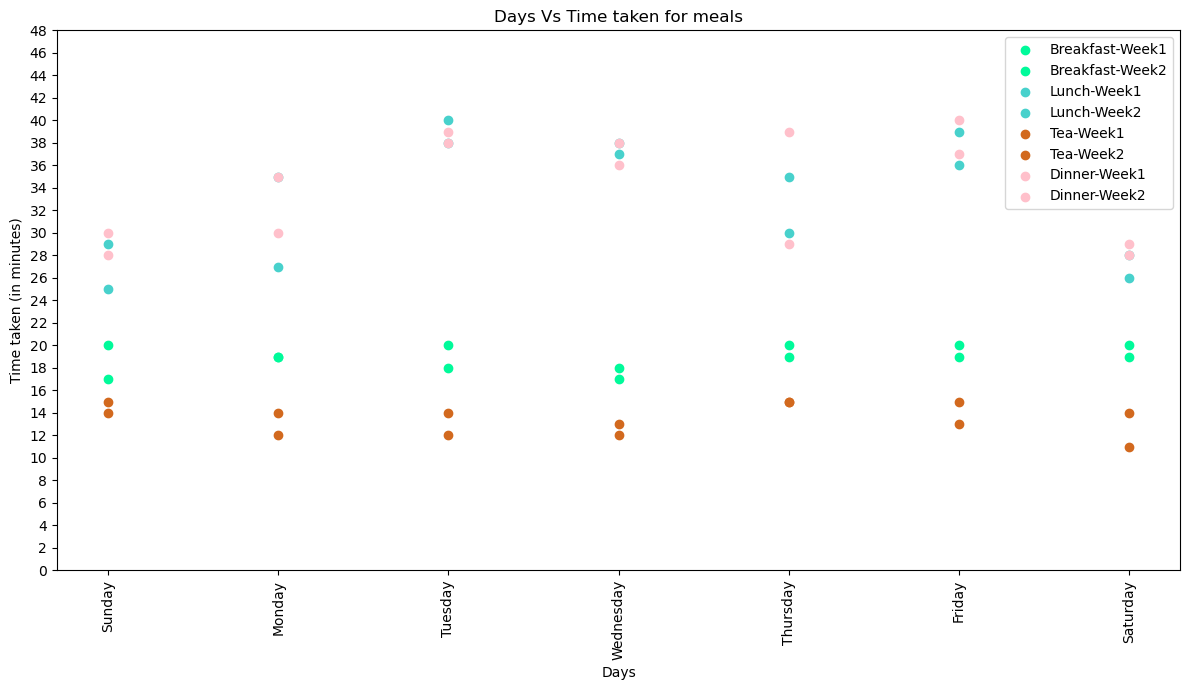

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))

breakfast_df = mess_dataset[(mess_dataset['Category'] == 'Breakfast')]
lunch_df = mess_dataset[(mess_dataset['Category'] == 'Lunch')]
tea_df = mess_dataset[(mess_dataset['Category'] == 'Tea')]
dinner_df = mess_dataset[(mess_dataset['Category'] == 'Dinner')]

days = breakfast_df['Day'][0:7]

ax.scatter(np.arange(len(days)), breakfast_df[0:7]['Time_taken'], color='mediumspringgreen')
ax.scatter(np.arange(len(days)), breakfast_df[7:14]['Time_taken'], color='mediumspringgreen')

ax.scatter(np.arange(len(days)), lunch_df[0:7]['Time_taken'], color='mediumturquoise')
ax.scatter(np.arange(len(days)), lunch_df[7:14]['Time_taken'], color='mediumturquoise')

ax.scatter(np.arange(len(days)), tea_df[0:7]['Time_taken'], color='chocolate')
ax.scatter(np.arange(len(days)), tea_df[7:14]['Time_taken'], color='chocolate')

ax.scatter(np.arange(len(days)), dinner_df[0:7]['Time_taken'], color='pink')
ax.scatter(np.arange(len(days)), dinner_df[7:14]['Time_taken'], color='pink')

ax.set_xlabel('Days')
ax.set_ylabel('Time taken (in minutes)')
ax.set_title('Days Vs Time taken for meals')

ax.set_xticklabels(days, rotation=90)
ax.set_xticks(np.arange(len(days)))
ax.set_yticks(np.arange(0, 50, 2))

ax.legend(['Breakfast-Week1','Breakfast-Week2','Lunch-Week1','Lunch-Week2','Tea-Week1','Tea-Week2','Dinner-Week1','Dinner-Week2'])
fig.tight_layout()
plt.show()

**2. Combined line graph for 'Time taken' against different days for each meal type**

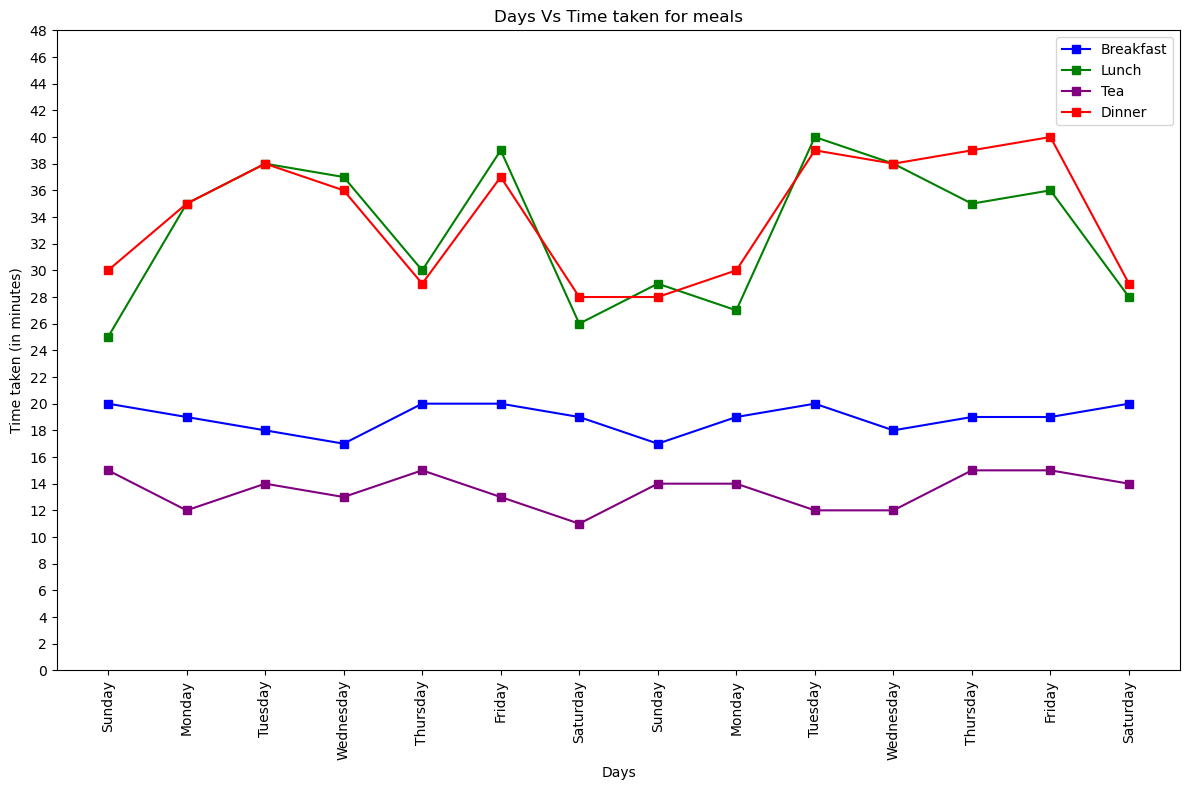

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

breakfast_df = mess_dataset[(mess_dataset['Category'] == 'Breakfast')]
lunch_df = mess_dataset[(mess_dataset['Category'] == 'Lunch')]
tea_df = mess_dataset[(mess_dataset['Category'] == 'Tea')]
dinner_df = mess_dataset[(mess_dataset['Category'] == 'Dinner')]

ax.plot(np.arange(len(breakfast_df['Day'])), breakfast_df['Time_taken'], marker = 's', color='b')
ax.plot(np.arange(len(lunch_df['Day'])), lunch_df['Time_taken'], marker = 's', color='g')
ax.plot(np.arange(len(tea_df['Day'])), tea_df['Time_taken'], marker = 's', color='purple')
ax.plot(np.arange(len(dinner_df['Day'])), dinner_df['Time_taken'], marker = 's', color='red')

ax.set_xlabel('Days')
ax.set_ylabel('Time taken (in minutes)')
ax.set_title('Days Vs Time taken for meals')
ax.set_xticks(np.arange(len(breakfast_df['Day'])))
ax.set_yticks(np.arange(0, 50, 2))

ax.set_xticklabels(breakfast_df['Day'], rotation=90)
ax.legend(['Breakfast','Lunch','Tea','Dinner'])

fig.tight_layout()
plt.show()

**3. Scatter plot of 'Category' Vs 'Time taken'**

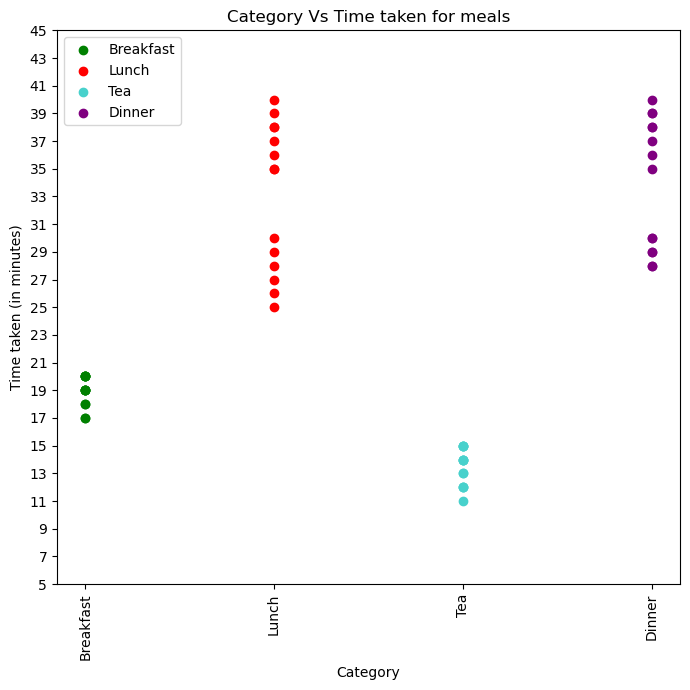

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
categories = ['Breakfast','Lunch','Tea','Dinner']

breakfast_xtick_locations = [0]*14
lunch_xtick_locations = [1]*14
tea_xtick_locations = [2]*14
dinner_xtick_locations = [3]*14

breakfast_df = mess_dataset[(mess_dataset['Category'] == 'Breakfast')]
lunch_df = mess_dataset[(mess_dataset['Category'] == 'Lunch')]
tea_df = mess_dataset[(mess_dataset['Category'] == 'Tea')]
dinner_df = mess_dataset[(mess_dataset['Category'] == 'Dinner')]

ax.scatter(breakfast_xtick_locations, breakfast_df['Time_taken'], color='g')
ax.scatter(lunch_xtick_locations, lunch_df['Time_taken'], color='r')
ax.scatter(tea_xtick_locations, tea_df['Time_taken'], color='mediumturquoise')
ax.scatter(dinner_xtick_locations, dinner_df['Time_taken'], color='purple')

ax.set_xlabel('Category')
ax.set_ylabel('Time taken (in minutes)')
ax.set_title('Category Vs Time taken for meals')

ax.set_xticklabels(categories, rotation=90)
ax.set_xticks(np.arange(len(categories)))
ax.set_yticks(np.arange(5, 46, 2))

ax.legend(categories)
fig.tight_layout()
plt.show()

**4. Analyzing boxplots for 'Time taken' Vs Each categorical feature**

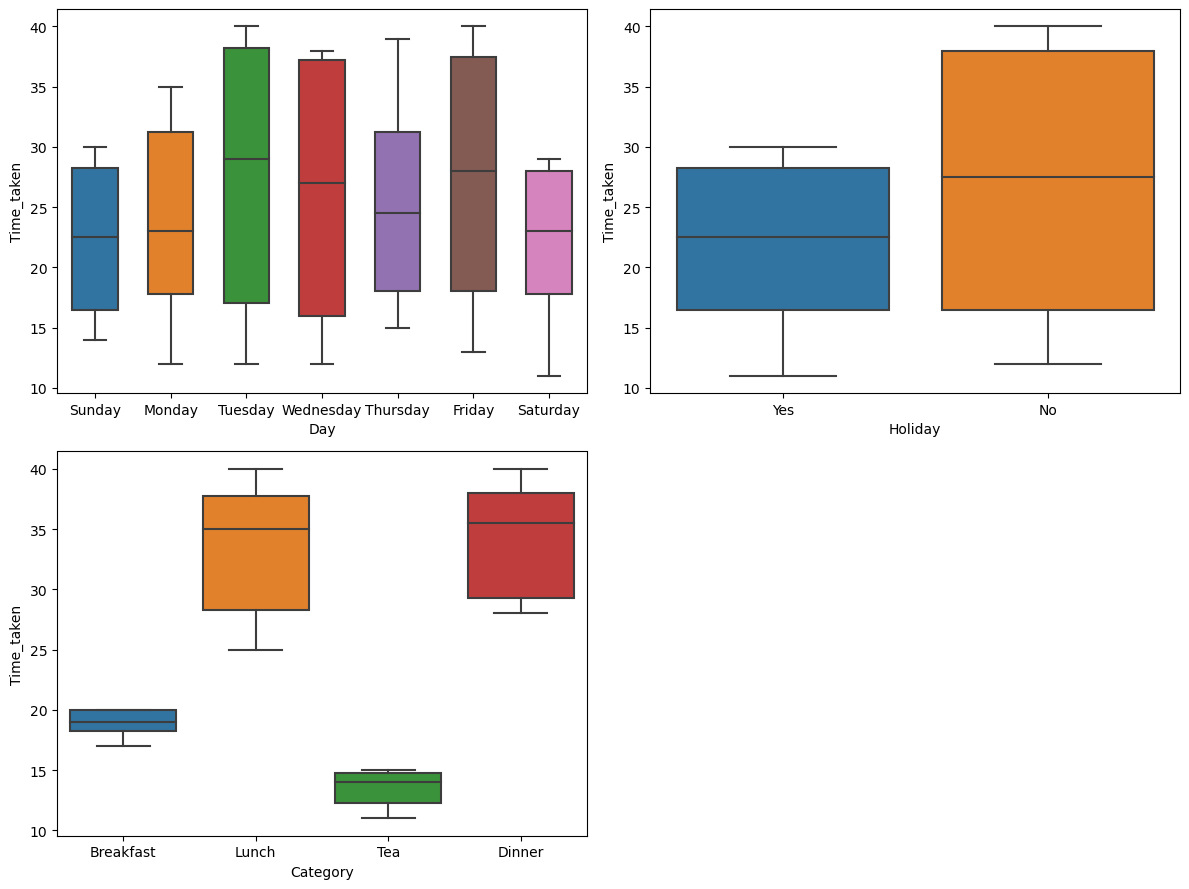

In [12]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(x='Day', y='Time_taken', data=mess_dataset, ax=axis1, width=0.6)
sns.boxplot(x='Holiday', y='Time_taken', data=mess_dataset, ax=axis2)
sns.boxplot(x='Category', y='Time_taken', data=mess_dataset, ax=axis3)
fig.delaxes(axis4)
plt.tight_layout()
plt.show()

#### **Observations:**
From above boxplots, we can observe that there are noteworthy variations in 'Time taken' against 'Category' feature.

##### **5. Analyzing the correlation between 'Time taken' and 'Minute' feature**

<Axes: >

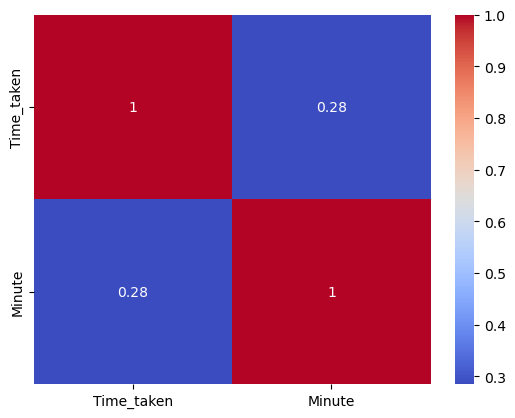

In [13]:
corr = mess_dataset[['Time_taken','Minute']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

There is pretty small but positive correlation between 'Time_taken' and 'Minute' features.  
Lets also see scatter plot of these features to take final decision about inclusion of this feature in X.

##### **6. Plotting pair plot for 'Time taken' against all non-categorical features**

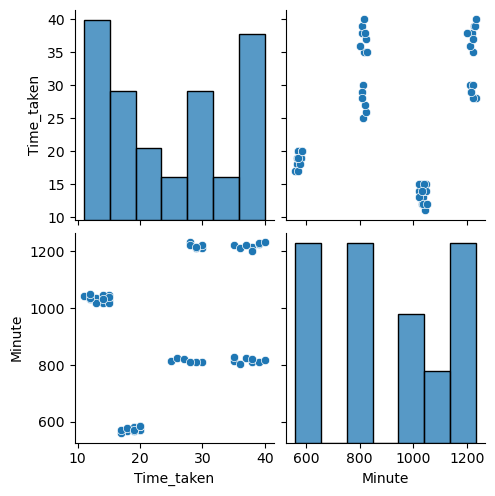

In [14]:
sns.pairplot(mess_dataset[['Time_taken','Minute']])
plt.show()

**7. Scatter plot of 'Time taken' Vs 'Minute' (Same plot can be seen from pairplot)**


<Axes: xlabel='Minute', ylabel='Time_taken'>

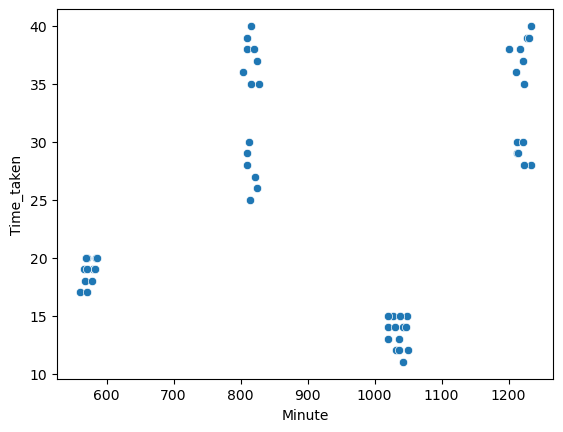

In [15]:
sns.scatterplot(x='Minute', y='Time_taken', data=mess_dataset)

**Observation:**  
We can observe that there is very little correlation between 'Time taken' and 'Minute' columns.  
**Hence excluding 'Minute' column from X**

##### **8. Visualizing histogram of 'Time taken' column to see its distribution pattern**

<Axes: ylabel='Count'>

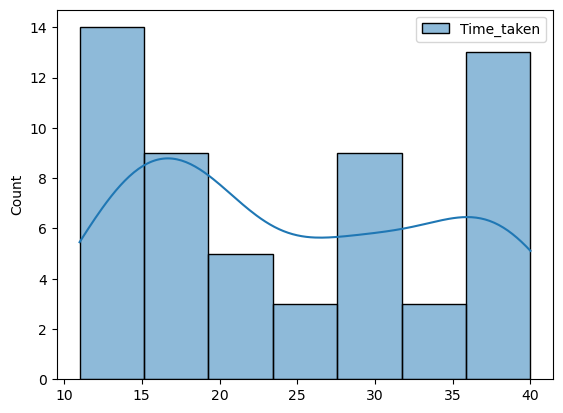

In [16]:
#'Kernel Distribution Estimation' plots are used to visualize distribution of data
sns.histplot(mess_dataset[['Time_taken']], kde=True)

**Observation:**  
We can see that the dependant variable Y (Time_taken) have all integer positive values.  
Therefore, assuming that the 'Time_taken' columns follows a poisson distribution.

---
##### **Step 3: Feature engineering:**

Based on above EDA, following observations are drawn:

1. We can see that the dependant variable Y (Time_taken) have all integer positive values.  
Therefore, assuming that the 'Time_taken' columns follows a "Poisson distribution".

2. We can observe that there is very little correlation between 'Time_taken' and 'Minute' columns.  
Hence excluding 'Minute' column from X.

3. 'Day', 'Holiday' and 'Category' are categorical features. Hence, they need to be converted into nominal features using OneHotEncoding scheme.  
We will use OneHotEncoding here, because these features are nomial, i.e. there is no order among values.  
Hence, in 'Feature Engineering' section we will encoeed them.

**A. Feature Selection: Deleting 'Holiday' and 'Day' features from X**

In [17]:
selected_mess_dataset = mess_dataset.drop(['Minute'], axis=1)
selected_mess_dataset.columns

Index(['Day', 'Holiday', 'Category', 'Time_taken'], dtype='object')

**B. Feature Transformation: Applying One Hot Encoding on categorical features**

In [18]:
categorical_column_names = selected_mess_dataset.select_dtypes(include='object').columns
categorical_column_names

Index(['Day', 'Holiday', 'Category'], dtype='object')

In [19]:
# Applying OneHotEncoding on categorical columns
# While encoding, we are one dummy column per category to avoid dummy varible trap, i.e to avoid multicollinearity.
encoded_mess_dataset = pd.get_dummies(selected_mess_dataset, columns = categorical_column_names)
encoded_mess_dataset.head()

,Time_taken,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Holiday_No,Holiday_Yes,Category_Breakfast,Category_Dinner,Category_Lunch,Category_Tea
0,20,0,0,0,1,0,0,0,0,1,1,0,0,0
1,25,0,0,0,1,0,0,0,0,1,0,0,1,0
2,15,0,0,0,1,0,0,0,0,1,0,0,0,1
3,30,0,0,0,1,0,0,0,0,1,0,1,0,0
4,19,0,1,0,0,0,0,0,1,0,1,0,0,0


In [20]:
encoded_mess_dataset.shape

(56, 14)

---
##### **Step 4: Segregating the dataset into Train and Test set**

In [21]:
X = encoded_mess_dataset.drop('Time_taken', axis=1)
print('Printing X:')
X.head()

Printing X:


,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Holiday_No,Holiday_Yes,Category_Breakfast,Category_Dinner,Category_Lunch,Category_Tea
0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,0,1,0,1,0,0,0


In [22]:
Y = encoded_mess_dataset['Time_taken']
print('Printing Y:')
Y.head()

Printing Y:


0    20
1    25
2    15
3    30
4    19
Name: Time_taken, dtype: int64

**Segregating the dataset into 80 % Train set and 20 % Test set**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('------------------ Train Set -------------------------')
print('Dimensions of X_train (rows,columns):', X_train.shape)
print('Dimensions of Y_train (rows,columns):', Y_train.shape)
print('------------------ Test Set --------------------------')
print('Dimensions of X_test (rows,columns):', X_test.shape)
print('Dimensions of Y_test (rows,columns):', Y_test.shape)

------------------ Train Set -------------------------
Dimensions of X_train (rows,columns): (44, 13)
Dimensions of Y_train (rows,columns): (44,)
------------------ Test Set --------------------------
Dimensions of X_test (rows,columns): (12, 13)
Dimensions of Y_test (rows,columns): (12,)


In [1]:
# Value of r-square lie between 0 to 1. (0 == worst and 1 == best)
def calculate_r_square(Y_test, Y_pred):
        ss_total = np.sum((Y_test - np.mean(Y_test)) ** 2)
        ss_residual = np.sum((Y_test - Y_pred) ** 2)
        r_squared = 1 - (ss_residual / ss_total)
        return r_squared

---
##### **Step 5: Fitting the Linear Regression model**

In [25]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
# Getting the predictions on test data
linear_reg_pred = linear_reg_model.predict(X_test)

In [27]:
print('MAE for Linear Regression on Test set:', np.mean(np.abs(Y_test - linear_reg_pred)))

MAE for Linear Regression on Test set: 2.9245569115559626


In [28]:
print('Linear regression R-square accuarcy on Test set:', round(calculate_r_square(Y_test,linear_reg_pred)*100,3),'%')

Linear regression R-square accuarcy on Test set: 83.767 %


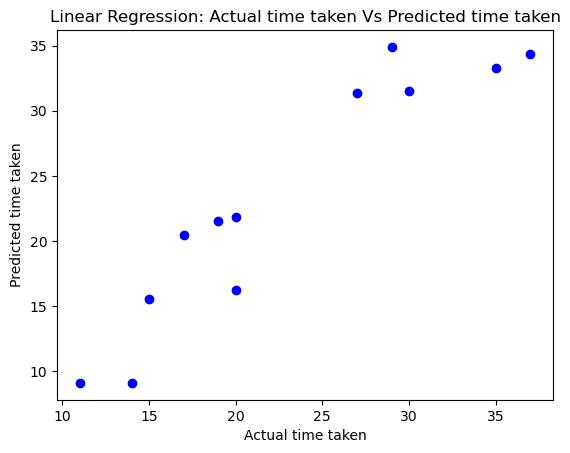

In [29]:
plt.scatter(Y_test, linear_reg_pred, color='b')
plt.title('Linear Regression: Actual time taken Vs Predicted time taken')
plt.xlabel('Actual time taken')
plt.ylabel('Predicted time taken')
plt.show()

---
##### **Step 6: Fitting Poisson Regression model**
We can see that the dependant variable Y (Time_taken) have all integer positive values, hence we are assuming the distribution to be poisson.  
Therefore, assuming that the 'Time_taken' columns follows a poisson distribution.  
Considering the scatter plots above, we can assume that the poisson distribution over samples will fit like below:  
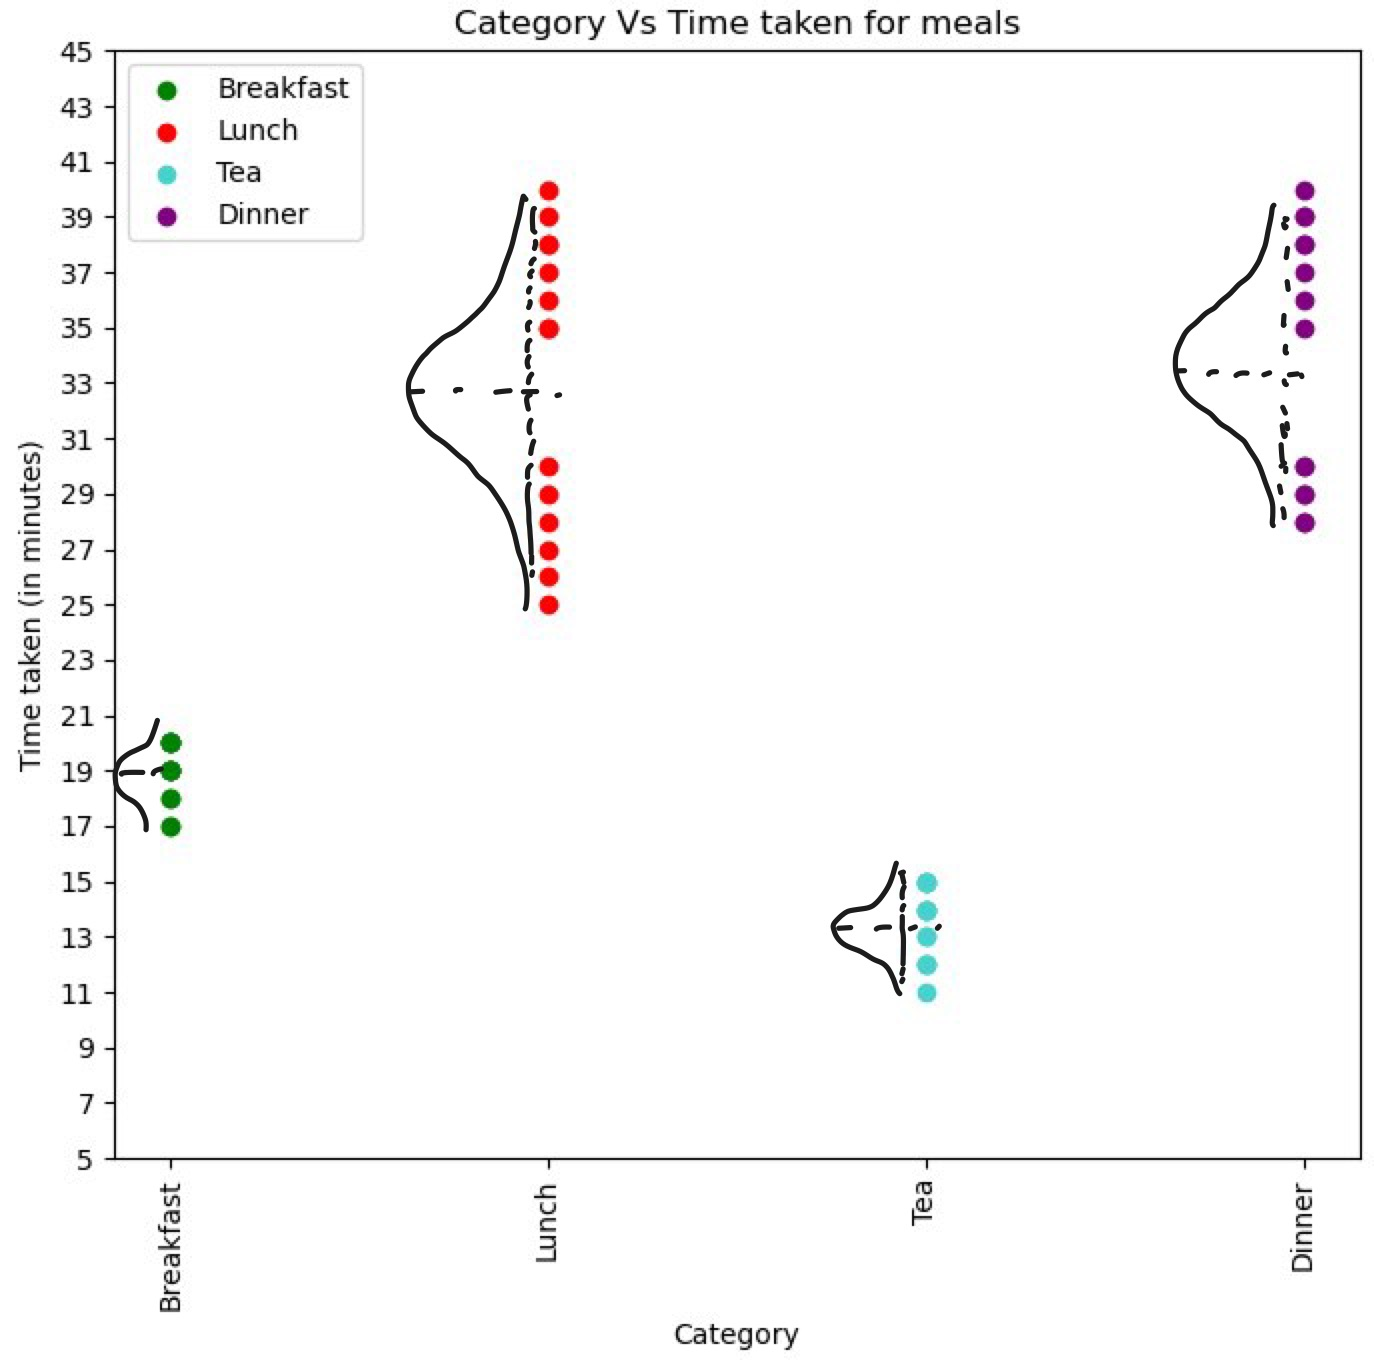  
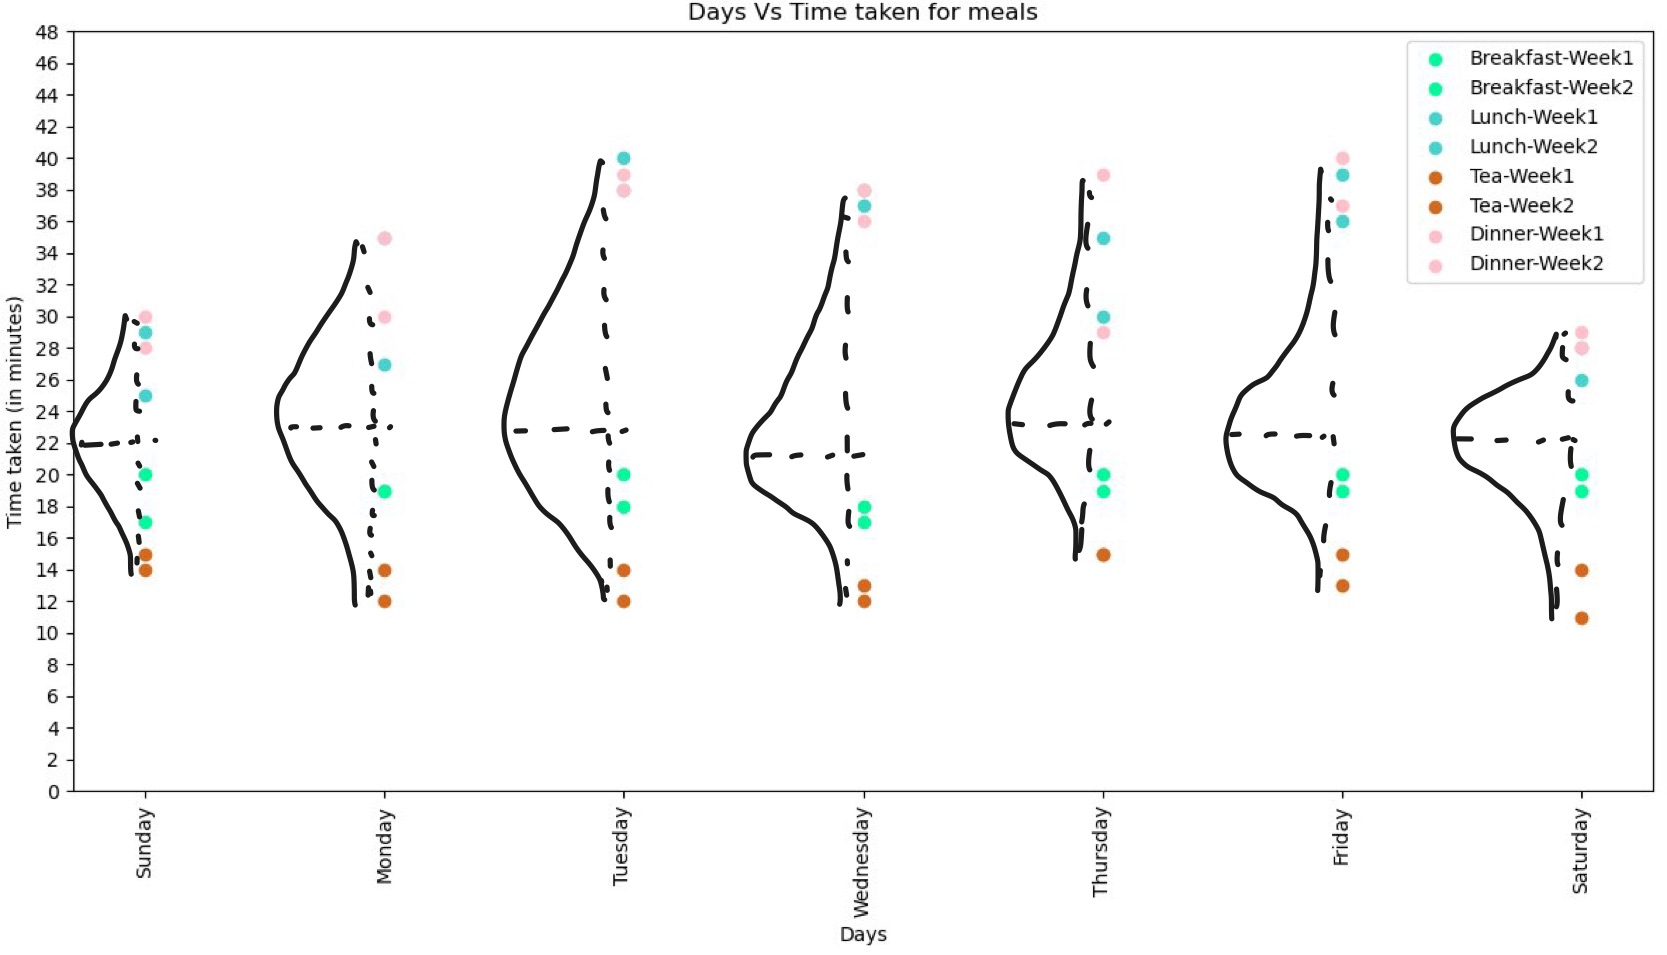   
---
We are obtaining the optimal weight vector W by iteratively minimizing the error function (instead of maximizing the likelihood) using gradient descent.  

In [30]:
# Poisson regression implementation using Gradient Descent.
def calculate_error(y, y_pred):
    return y - y_pred

def compute_gradient(X, y, W):
    # error = (y - e^(X.W))
    error = calculate_error(y, np.exp(np.dot(X, W)))
    # gradient = X.T.(y - e^(X.W))
    gradient = np.dot(X.T, error)
    return gradient

def predict_Y(X, W):
    return np.exp(np.dot(X, W))
    
def initialize_weights(num_features):
    W = np.zeros(num_features)
    return W

W = np.zeros(X_train.shape[1])
learning_rate = 0.001
num_of_epochs = 10000
for i in range(num_of_epochs):
    gradient = compute_gradient(X_train, Y_train, W)
    W  = W + (learning_rate * gradient)
print("Estimated Weight vector:", W)

Estimated Weight vector: [0.56260827 0.47469721 0.40701259 0.41703202 0.55830723 0.5693132
 0.52130315 1.79397869 1.71629499 0.68410359 1.27178736 1.23064244
 0.32374029]


In [31]:
predicted_poi_y = predict_Y(X_test, W)
print("Predicted Ys:", predicted_poi_y)

Predicted Ys: [16.73379959 33.09288606 30.61942568 34.67171655 34.68785326 14.58986701
 21.06042065 11.55418677 20.82990119 20.07319666 11.55418677 30.11774005]


In [32]:
print('MAE Poisson regression:',np.mean(np.abs((Y_test - predicted_poi_y))))

MAE Poisson regression: 2.1916890234455826


In [33]:
print('Poisson regression R-square accuarcy:', round(calculate_r_square(Y_test,predicted_poi_y)*100,3),'%')

Poisson regression R-square accuarcy: 89.3 %


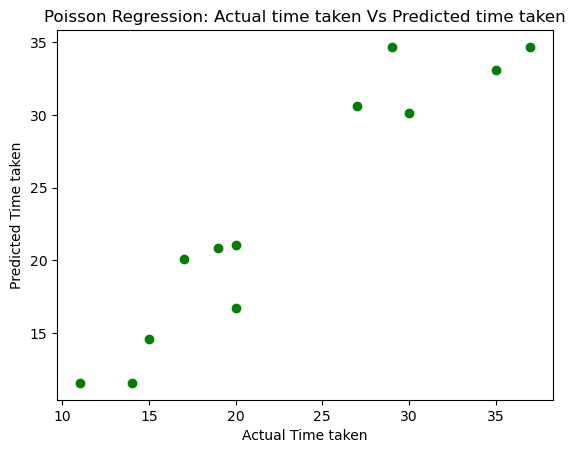

In [34]:
plt.scatter(Y_test, predicted_poi_y, color='g')
plt.title('Poisson Regression: Actual time taken Vs Predicted time taken')
plt.xlabel('Actual Time taken')
plt.ylabel('Predicted Time taken')
plt.show()

---
##### **Step 7: Comparing Linear regression and Poisson regression performance**

In [35]:
print('Linear regression R-square accuarcy on Test set:', round(calculate_r_square(Y_test,linear_reg_pred)*100,3),'%')
print('Poisson regression R-square accuracy on Test set:', round(calculate_r_square(Y_test,predicted_poi_y)*100,3),'%')

Linear regression R-square accuarcy on Test set: 83.767 %
Poisson regression R-square accuracy on Test set: 89.3 %


In [36]:
print('MAE for Linear Regression on Test set:', np.mean(np.abs(Y_test - linear_reg_pred)))
print('MAE Poisson regression on Test set:', np.mean(np.abs((Y_test - predicted_poi_y))))

MAE for Linear Regression on Test set: 2.9245569115559626
MAE Poisson regression on Test set: 2.1916890234455826


**Observation:  
Based on above 2 metrics MAE (Mean Absolute Error) and R-square, poisson regression is performing better than linear regression**